# Limits

## The method of exhaustion

The method of exhaustion is a way to find the area of a shape by breaking it down into smaller and smaller pieces until the area can be calculated exactly.

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon
import sympy as sp

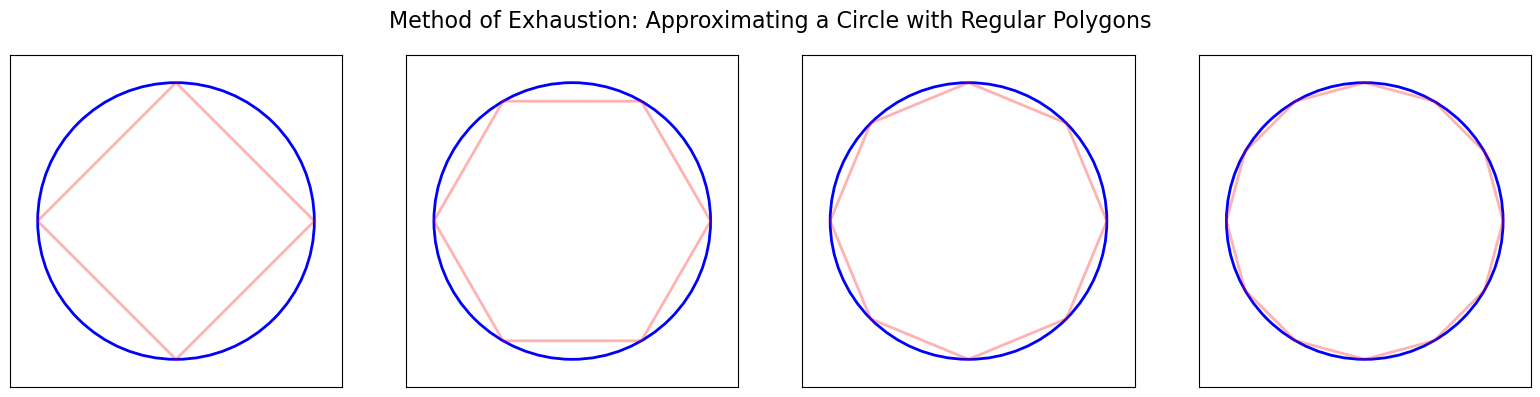

In [94]:
# Create figure with 1x4 subplots (single row)
fig, axs = plt.subplots(1, 4, figsize=(16, 4))  # Wider, less tall figure

# Circle radius
radius = 1

# Number of sides for each polygon
sides = [4, 6, 8, 12]  # square, hexagon, octagon, dodecagon
names = ["Square", "Hexagon", "Octagon", "Dodecagon"]

# Create each subplot
for i, (ax, n, name) in enumerate(zip(axs, sides, names)):
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)

    # Draw circle
    circle = Circle((0, 0), radius, fill=False, color='blue', lw=2)
    ax.add_patch(circle)

    # Calculate polygon vertices
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Create and add polygon
    polygon = Polygon(np.column_stack([x, y]), fill=False, alpha=0.3, color='red', lw=2)
    ax.add_patch(polygon)

    # Calculate areas
    circle_area = np.pi * radius**2
    polygon_area = (n/2) * radius**2 * np.sin(2*np.pi/n)
    ratio = polygon_area / circle_area

    # Add title
    #ax.set_title(f"{name} \nArea ratio: {ratio:.4f}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('Method of Exhaustion: Approximating a Circle with Regular Polygons',
             fontsize=16)
plt.tight_layout()
plt.show()

## Calculus of the Infinitesimals

As integral accuracy improves as we approach an infinite-sided polygon, so does the differential accuracy improve as we approach a curve infinitely closely.

In [95]:
x = np.linspace(-10, 10, 1000)

if $y = x^2 + 2x +2$:

In [96]:
y = x**2 + 2*x + 2

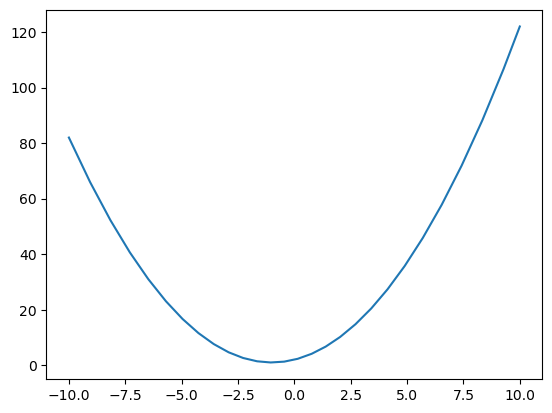

In [97]:
fig, ax = plt.subplots()
_ = ax.plot(x,y)

- There are no straight lines in the graph of a polynomial function.
- If we zoom in infinitely close, we observe curves that approach straight lines.
- This enables us to find a slope $m$ (tangent) anywhere on the curve, including where $m = 0$:

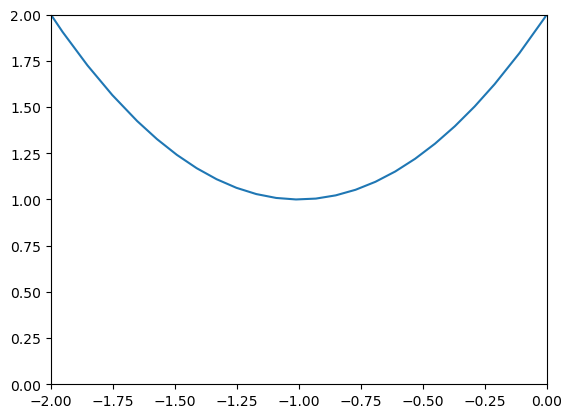

In [98]:
ig, ax = plt.subplots()
ax.set_xlim([-2, -0])
ax.set_ylim([0, 2])
_ = ax.plot(x,y)

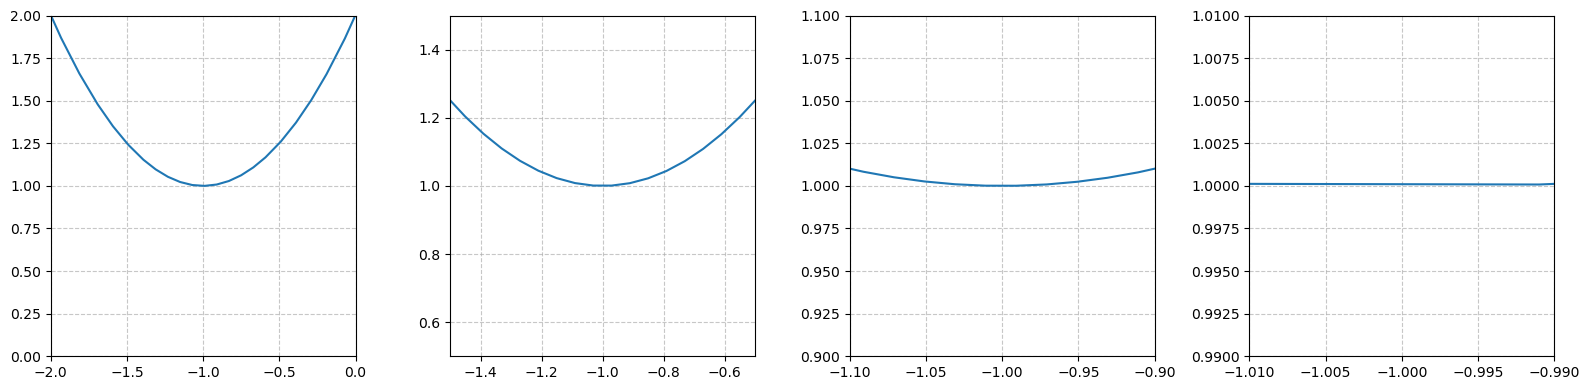

In [99]:
# Create figure with 1x4 subplots showing progressive zoom
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Function
x = np.linspace(-10, 10, 1000)
y = x**2 + 2*x + 2

# Zoom levels
zoom_levels = [
    {'xlim': [-2, 0], 'ylim': [0, 2], 'title': "Zoom level 1"},
    {'xlim': [-1.5, -0.5], 'ylim': [0.5, 1.5], 'title': "Zoom level 2"},
    {'xlim': [-1.1, -0.9], 'ylim': [0.9, 1.1], 'title': "Zoom level 3"},
    {'xlim': [-1.01, -0.99], 'ylim': [0.99, 1.01], 'title': "Zoom level 4"}
]

# Create each subplot
for i, (ax, zoom) in enumerate(zip(axs, zoom_levels)):
    ax.plot(x, y)
    ax.set_xlim(zoom['xlim'])
    ax.set_ylim(zoom['ylim'])
    #ax.set_title(zoom['title'])

    # Add gridlines to better see the straightening effect
    ax.grid(True, linestyle='--', alpha=0.7)

    # Mark the point we're zooming into (-1, 1)
    #ax.plot(-1, 1, 'ro', markersize=4)


plt.tight_layout()
plt.show()

## Calculating limits

### Continuous function

To calculate the limit of a continuous function:

$$\lim_{x \to a} f(x) = f(a)$$

For example, the limit of $f(x) = x^2 + 2x + 2$ as $x$ approaches $5$ is:

$$\lim_{x \to 5} f(x) = 5^2 + 2(5) + 2 = 37$$

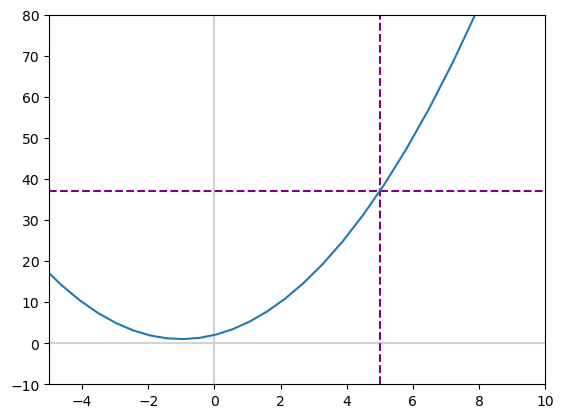

In [100]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-5, 10)
plt.ylim(-10, 80)
plt.axvline(x=5, color='purple', linestyle='--')
plt.axhline(y=37, color='purple', linestyle='--')
_ = ax.plot(x,y)

### Non-continuous function

As an example, this function:

$$\lim_{x \to 1} \frac{x^2 - 1}{x - 1}$$

The limit cannot be calculated by substituting $x = 1$ directly, as it results in a division by zero.

In [101]:
def my_fxn(my_x):
    my_y = (my_x**2 - 1)/(my_x - 1)
    return my_y

In [102]:
y = my_fxn(x)

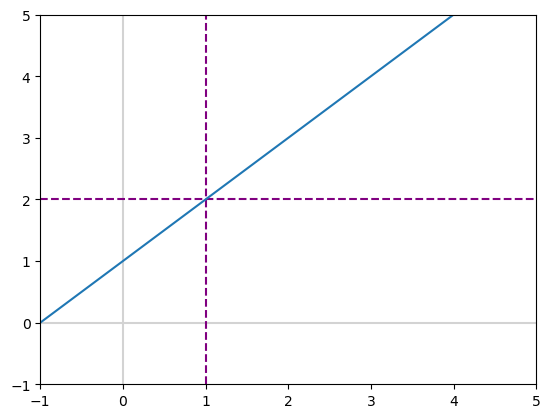

In [103]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.axvline(x=1, color='purple', linestyle='--')
plt.axhline(y=2, color='purple', linestyle='--')
_ = ax.plot(x,y)

A simpler way to calculate the limit is using `sympy`:

In [104]:
sym_x = sp.symbols('x')

In [105]:
f = (sym_x**2 - 1)/(sym_x - 1)

In [106]:
limit_result = sp.limit(f, sym_x, 1)
limit_result

2

In other cases, algebra cannot be used. For example:

$$\lim_{x \to 0} \frac{\sin(x)}{x}$$

In [107]:
def sin_fxn(my_x):
    my_y = np.sin(my_x)/my_x
    return my_y

In [108]:
y = sin_fxn(x)

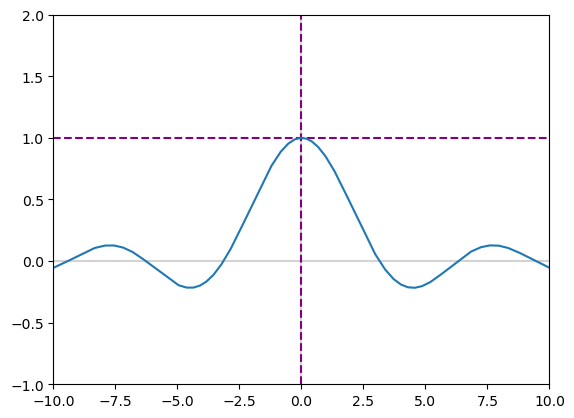

In [109]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-1, 2)
plt.axvline(x=0, color='purple', linestyle='--')
plt.axhline(y=1, color='purple', linestyle='--')
_ = ax.plot(x,y)

With `sympy`, we can calculate the limit:

In [111]:
sin_lim = sp.limit(sp.sin(sym_x)/sym_x, sym_x, 0)
sin_lim

1

It is common for limits to approach infinity. For example:

$$\lim_{x \to 0} \frac{25}{x}$$

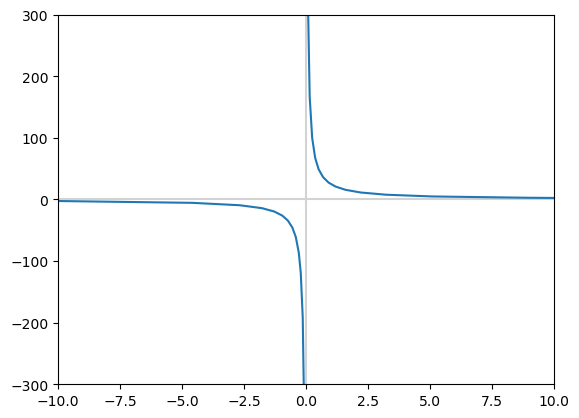

In [117]:
def inf_fxn(my_x):
    my_y = 25/my_x
    return my_y
y = inf_fxn(x)

left_x = x[x<0]
right_x = x[x>0]
left_y = inf_fxn(left_x)
right_y = inf_fxn(right_x)

fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')
plt.xlim(-10, 10)
plt.ylim(-300, 300)
ax.plot(left_x, left_y, c='C0')
_ = ax.plot(right_x, right_y, c='C0')

With `sympy`, we can calculate the limit:

In [118]:
inf_lim = sp.limit(25/sym_x, sym_x, 0)
inf_lim

oo

In [122]:
# limit of x approaching 0 x^2 - 1 / x - 1
sp.limit((sym_x**2 - 1)/(sym_x - 1), sym_x, 0)

1

In [128]:
# limit of x approaching -5 x^2 - 25 / x + 5
sp.limit((sym_x**2 - 25)/(sym_x + 5), sym_x, -5)

-10

In [124]:
# limit of x approaching 4 (x^2 - 2x - 8) / (x - 4)
sp.limit((sym_x**2 - 2*sym_x - 8)/(sym_x - 4), sym_x, 4)

6

In [129]:
# limit of x approaching -infinity 25 / x
sp.limit(25/sym_x, sym_x, -sp.oo)

0

In [131]:
# limit of x approaching 0 25/x
# left-hand limit
left_lim = sp.limit(25/sym_x, sym_x, 0, dir='-')
# right-hand limit
right_lim = sp.limit(25/sym_x, sym_x, 0, dir='+')
left_lim, right_lim

(-oo, oo)